# Hyperparameter tuning

ESM-2 and ESM-1b, binary and continuous

In [1]:
import pandas as pd
from ray.tune import ExperimentAnalysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', style="darkgrid", font="serif", palette=None, font_scale=1.1)

In [134]:
# Reading binary results
df_hyp_disprot_esm1 = ExperimentAnalysis("../data/results/hyperparam_tune/hyperparam_tune_disprot_esm1").results_df.dropna(subset=['loss'])
df_hyp_disprot_esm2 = ExperimentAnalysis("../data/results/hyperparam_tune/hyperparam_tune_disprot_esm1").results_df.dropna(subset=['loss'])

df_hyp_disprot_esm1['model_name'] = 'facebook/esm-1b'
df_hyp_disprot_esm2['model_name'] = 'esm2_t33_650M_UR50D'

df_hyp_disprot = pd.concat([df_hyp_disprot_esm1, df_hyp_disprot_esm2])

In [138]:
# Reading continuous results
df_hyp_chezod_esm1 = ExperimentAnalysis("../data/results/hyperparam_tune/hyperparam_tune_disprot_esm1").results_df.dropna(subset=['loss'])
df_hyp_chezod_esm2 = ExperimentAnalysis("../data/results/hyperparam_tune/hyperparam_tune_disprot_esm1").results_df.dropna(subset=['loss'])

df_hyp_chezod_esm1['model_name'] = 'facebook/esm-1b'
df_hyp_chezod_esm2['model_name'] = 'esm2_t33_650M_UR50D'

df_hyp_chezod = pd.concat([df_hyp_chezod_esm1, df_hyp_chezod_esm2])

### Comparing important hyperparameters

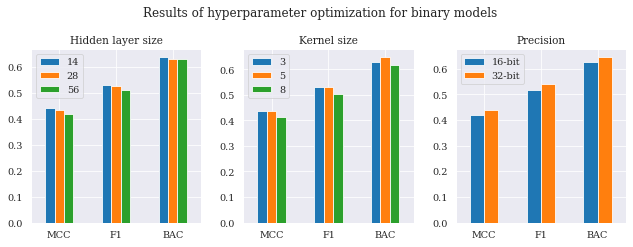

In [137]:
%matplotlib inline
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(9, 3))
fig.tight_layout()

df_hyp_disprot.groupby(by='config/cnn_bottleneck').median()[['mcc', 'f1', 'bac']].T.plot(ax=ax1, kind="bar", rot=0, title='Hidden layer size')
ax1.legend(labels=['14', '28', '56'])
ax1.set_xticks(range(3), labels=['MCC', 'F1', 'BAC'])

df_hyp_disprot.groupby(by='config/cnn_kernel_n').median()[['mcc', 'f1', 'bac']].T.plot(ax=ax2, kind="bar", rot=0, title='Kernel size')
ax2.legend(labels=['3', '5', '8'])
ax2.set_xticks(range(3), labels=['MCC', 'F1', 'BAC'])

df_hyp_disprot.groupby(by='config/precision').median()[['mcc', 'f1', 'bac']].T.plot(ax=ax3, kind="bar", rot=0, title='Precision')
ax3.legend(labels=['16-bit', '32-bit'])
ax3.set_xticks(range(3), labels=['MCC', 'F1', 'BAC'])

fig.suptitle('Results of hyperparameter optimization for binary models', fontsize=12, y=1.13)
fig.savefig('../figures/2022-10-26_hyperparam_tune/bars_hyperparam_optim_disprot.png', bbox_inches='tight')
plt.show()

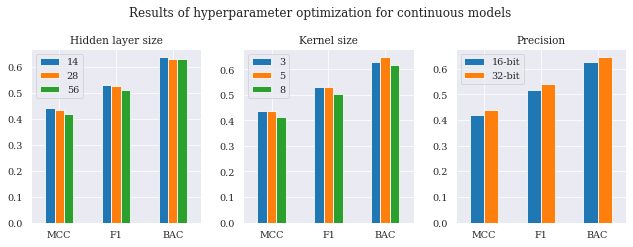

In [139]:
%matplotlib inline
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(9, 3))
fig.tight_layout()

df_hyp_chezod.groupby(by='config/cnn_bottleneck').median()[['auroc', 'spearman']].T.plot(ax=ax1, kind="bar", rot=0, title='Hidden layer size')
ax1.legend(labels=['14', '28', '56'])
ax1.set_xticks(range(2), labels=['AUROC', 'Spearman'])

df_hyp_chezod.groupby(by='config/cnn_kernel_n').median()[['auroc', 'spearman']].T.plot(ax=ax2, kind="bar", rot=0, title='Kernel size')
ax2.legend(labels=['3', '5', '8'])
ax2.set_xticks(range(2), labels=['AUROC', 'Spearman'])

df_hyp_chezod.groupby(by='config/precision').median()[['auroc', 'spearman']].T.plot(ax=ax3, kind="bar", rot=0, title='Precision')
ax3.legend(labels=['16-bit', '32-bit'])
ax3.set_xticks(range(2), labels=['AUROC', 'Spearman'])

fig.suptitle('Results of hyperparameter optimization for continuous models', fontsize=12, y=1.13)
fig.savefig('../figures/2022-10-26_hyperparam_tune/bars_hyperparam_optim_chezod.png', bbox_inches='tight')
plt.show()

### Choosing Embedding

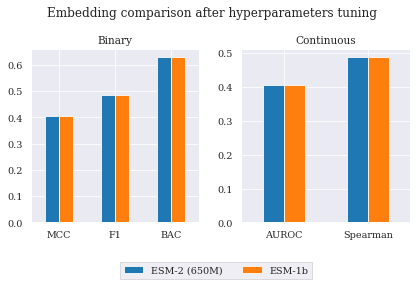

In [157]:
%matplotlib inline
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 3))
fig.tight_layout()

df_hyp_disprot.groupby(by='model_name').mean()[['mcc', 'f1', 'bac']].T.plot(ax=ax1, kind='bar', rot=0, title='Binary', legend=False)
ax1.set_xticks(range(3), labels=['MCC', 'F1', 'BAC'])

df_hyp_chezod.groupby(by='model_name').mean()[['mcc', 'f1']].T.plot(ax=ax2, kind='bar', rot=0, title='Continuous', legend=False)
ax2.set_xticks(range(2), labels=['AUROC', 'Spearman'])

ax1.legend(labels=['ESM-2 (650M)', 'ESM-1b'], loc='upper center', bbox_to_anchor=(1.1, -0.2), fancybox=False, shadow=False, ncol=2)
fig.suptitle('Embedding comparison after hyperparameters tuning', fontsize=12, y=1.13)
fig.savefig('../figures/2022-10-26_hyperparam_tune/bars_hyperparam_embeddings.png', bbox_inches='tight')
plt.show()

### Less important hyperparams

Encoder rate not relevant for binary models without fine-tuning

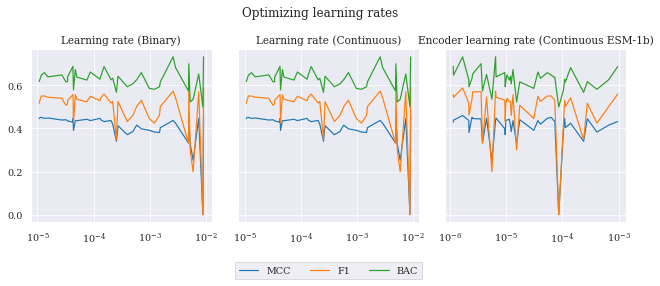

In [144]:
%matplotlib inline
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(9, 3))
fig.tight_layout()

df_hyp_disprot.groupby(by='config/learning_rate').mean()[['mcc', 'f1', 'bac']].plot(ax=ax1, rot=0, title='Learning rate (Binary)', legend=False, xlabel='', logx=True)

df_hyp_chezod.groupby(by='config/learning_rate').mean()[['auroc', 'spearman']].plot(ax=ax2, rot=0, title='Learning rate (Continuous)', legend=False, xlabel='', logx=True)

df_hyp_chezod_esm1.groupby(by='config/encoder_learning_rate').mean()[['auroc', 'spearman']].plot(ax=ax3, rot=0, title='Encoder learning rate (Continuous ESM-1b)', legend=False, xlabel='', logx=True)

ax1.legend(labels=['MCC', 'F1', 'BAC'], loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=False, shadow=False, ncol=3)
ax2.legend(labels=['AUROC', 'Spearman'], loc='upper center', bbox_to_anchor=(1.5, -0.2), fancybox=False, shadow=False, ncol=2)
fig.suptitle('Optimizing learning rates', fontsize=12, y=1.13)
fig.savefig('../figures/2022-10-26_hyperparam_tune/bars_hyperparam_learning_rates.png', bbox_inches='tight')
plt.show()